<h1 style="color:#1E90FF; font-weight:bold;">BTS</h1>
<h2 style="color:#1E90FF; font-weight:bold;">MBDS - Big Data & AI</h2>
<h3 style="color:#1E90FF; font-weight:bold;">DSF - Assignment 3 - SmartInvestment.com</h3>
<h4 style="color:#1E90FF; font-weight:bold;">Pablo Ruiz Lopez</h4>

# SmartInvestment.com

Welcome to **SmartInvestment.com**, a pioneering firm dedicated to delivering unparalleled investment solutions. We specialize in creating meticulously tailored investment funds, designed to strike the perfect balance between maximizing returns and minimizing risks.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/pablo-git8/SmartInvestment-SP500-Fund/main/images/smartinvestment_BTS.png" width="400">
</div>

`FAANG+_forever` is one of the SmartInvestment.com funds and stands as a crafted fund that precisely tracks the S&P 500 Index, denoted as `SPX` in our data. The performance of our fund is linked to that of the index, ensuring that investors experience a direct correlation with the broader market trends. As the S&P 500 rises, FAANG+_forever is engineered to capture that upward momentum, translating it into an increase of fund value. Conversely, when the index faces a downturn, the fund is expected to reflect this decline. The aim of FAANG+_forever, as with any index fund, is to authentically emulate the performance of the S&P 500, all while diligently managing and minimizing the associated fees and operational expenses.

Regarding its composition, FAANG+_forever is structured in the following manner:

- 15% Facebook (Meta). Symbol META
- 10% Netflix. Symbol NFLX
- 25% Apple. Symbol APPL
- 15% Tesla. Symbol TSLA
- 20% Google (Alphabet). Symbol GOOGL
- 15% Amazon. Symbol AAMZ

## Project Objectives Overview

This project is tailored to meet specific regulatory requirements and enhance investor experience through comprehensive reporting and visual analytics. Below are the detailed objectives:

### Quarterly Performance Reporting:

Provide investors with a detailed quarter-by-quarter performance report.

#### Details:
- **Performance Metrics**: Calculate the percentage increase or decrease in the fund's value, with negative percentages indicating a loss.
- **Comparison Benchmark**: Compare the fund's performance against the S&P 500 Index (SPX500) to give investors a market-relative perspective.

### Visual Short-Term Analytics:

Enhance investor engagement and provide insights into short-term trends through interactive charts.

##### 1. Weekly Gain/Loss Percentage:
- **Chart Type**: Line Chart
- **Content**: Simultaneously plot the weekly gain or loss percentages of both the fund and SPX.
- **Purpose**: Offer a direct visual comparison of short-term performance fluctuations between the fund and the market.

##### 2. Cumulative Weekly Gain/Loss Percentage:
- **Chart Type**: Line Chart
- **Content**: Display the accumulated weekly gain or loss percentages for both the fund and SPX.
- **Purpose**: Help investors understand the overall momentum and trend direction, facilitating better-informed decisions based on short-term market behaviors.

By achieving these objectives, we aim to ensure regulatory compliance, provide transparent performance insights, and enhance the investor experience through visual analytics.

In [1]:
# Setting up non-conventional libraries
#! pip install plotly
#! pip install nbformat

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Magic commands for visualization
%matplotlib inline

## Reading CSV Files

Let's start by reading he data provided. The data comes in different 14 CSV files containing the fund stocks.

**IMPORTANT NOTE:** `/market_data` path is considering having only the 'STOCK_x.csv' files on it and no other '.csv' file included.

In [3]:
path = "market_data"
# Listing all files in the provided directory path
files = os.listdir(path)

# Parsing date strings, ignoring any timezone information and converting them to datetime objects
date_parser = lambda x: pd.to_datetime(x[:19])

# Reading each CSV file that ends with '.csv' excluding 'users.csv' into a list object and then converting it to a DataFrame
stocks_index_list = [pd.read_csv(os.path.join(path, f), converters={'Date': date_parser}) # Using the lambda function to parse the 'Date' column
                .set_index('Date')
                .assign(Stock=f[:-6]) for f in files if f.endswith('.csv')] # Adding 'Stock' column with stock names, derived from the CSV file name.

# Concatenating DataFrames
stocks_index_df = pd.concat(stocks_index_list).sort_index(ascending=True)

## **Basic Data Exploration**

In [4]:
stocks_index_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock
Date,,,,,,,,
2022-12-01,96.989998,97.230003,94.919998,95.500000,68488000,0.0,0.0,AMZN
2022-12-01,197.080002,198.919998,191.800003,194.699997,80046200,0.0,0.0,TSLA
2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,0.0,SPX
2022-12-01,119.199997,121.199997,118.400002,120.440002,36551400,0.0,0.0,META
2022-12-01,303.989990,319.799988,303.029999,316.950012,14664900,0.0,0.0,NFLX


In [5]:
stocks_index_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1589 entries, 2022-12-01 to 2023-10-26
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1589 non-null   float64
 1   High          1589 non-null   float64
 2   Low           1589 non-null   float64
 3   Close         1589 non-null   float64
 4   Volume        1589 non-null   int64  
 5   Dividends     1589 non-null   float64
 6   Stock Splits  1589 non-null   float64
 7   Stock         1589 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 111.7+ KB


### **DataFrame Description**

This DataFrame consists of financial data with a total of 1589 entries and 8 columns, indexed with `DatetimeIndex` ranging from 2022-12-01 to 2023-10-26. Memory usage is of about 111.7+ KB which is also really small. The following variables can be found in the dataframe:

| Variable    | Description                                                        | Datatype     |
|-------------|--------------------------------------------------------------------|--------------|
| `Open`  | The opening price of the stock for the trading day.                 | float64        |
| `High`         | The highest price of the stock during the trading day.                                             | float64        | 
| `Low`      | The lowest price of the stock during the trading day.                      | float64       | 
| `Close`         | The closing price of the stock for the trading day.                    | float64       |   
| `Volumne` | The number of shares that were traded during the day.                          | int64       | 
| `Dividends`   | The dividend amount paid out per share.                      | float64       |   
| `Stock Splits`        | The ratio by which the stock is split. A 2.0 here would indicate a 2-for-1 stock split.                       | float64       |  
| `Stocks`      | The name or identifier of the stock.                       | object       |  
| `drugs`       | Drug usage habits (e.g., never, sometimes).                        | float64       |

In [6]:
# Summary statistics
stocks_index_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1589.000000,1589.000000,1589.000000,1589.000000,1.589000e+03,1589.000000,1589.0
mean,771.689162,777.590719,765.878254,771.907299,6.195306e+08,0.000447,0.0
std,1404.782239,1411.708420,1397.477109,1404.869052,1.416806e+09,0.010279,0.0
min,82.800003,83.480003,81.430000,81.820000,0.000000e+00,0.000000,0.0
25%,129.800003,131.479996,128.350006,129.660004,2.409090e+07,0.000000,0.0
50%,186.350006,189.190002,183.690002,185.899994,5.098840e+07,0.000000,0.0
75%,325.119995,330.079987,321.100006,325.480011,1.166622e+08,0.000000,0.0
max,4598.259766,4607.069824,4573.140137,4588.959961,9.354280e+09,0.240000,0.0


## **Basic EDA Based on Summary**

### Overall Market Behavior:
1. **Volatility**: The standard deviation (std) of the 'Open', 'High', 'Low', and 'Close' prices are quite large (between 1397.477109 and 1411.708420), suggesting that the markets represented by this data experienced significant price volatility or variation in stock prices across different stocks or time periods.

2. **Price Range**: The stocks had a wide range of trading prices, with the 'Close' prices ranging from a minimum of 81.82 to a maximum of 4588.96. This indicates substantial price movement accross the stocks and reflects different market phases.

3. **Volume**: The trading volume has a very wide range, with a mean of around 619 million and a maximum volume of over 9 billion. The large standard deviation in volume indicates inconsistent trading activity between stocks or days.

### Trading Activity:
1. **Liquidity**: The fact that there are 1589 non-null entries for each column indicates that these stocks were traded on every day of the period covered by the data. This suggests high liquidity.

2. **Trading Consistency**: The prices and volumes have a large range and standard deviation, indicating inconsistency in trading prices and activity.

### Dividends and Stock Splits:
1. **Dividends**: The mean dividends are very close to zero, with a maximum value of 0.24. This suggests that dividends are not regularly paid in any stock, or when they are, they are small.

2. **Stock Splits**: There are no stocks splits recorded in this dataset as the mean and maximum values for 'Stock Splits' are 0. Since this column becomes irrelevant, we can safely remove it from the DataFrame.

In [7]:
stocks_index_df.drop(columns=['Stock Splits'], inplace=True)

## **Part 1: Quarterly Performance Reports**

Provide to our investors a quarter by quarter report with the proformance of the fund (% increased or lost, in that case the % will be negarive) comparing it with the performance of the SPX500.

The report should look like this:

| -    | Fund Gain/Loss %   | SPX Gain/Loss %     | Fund vs SPX % |
|-------------|--------------------------------------------------------------------|--------------|--|
| `2023-Q1`  | 5.21%                 | 3.34%       | 1.87% |
| `2023-Q2`         | -3.45%                                             | 1.22%       | -5.11% |
| `2023-Q3`      | 2.26%                      | 2.04%       | 0.22% |

We will begin by defining the fund composition and creating dataframes for fund stocks and the SPX index.

In [8]:
fund_composition = {
    'META': 0.15,
    'NFLX': 0.10,
    'AAPL': 0.25,
    'TSLA': 0.15,
    'GOOGL': 0.20,
    'AMZN': 0.15,
}

# Filtering the dataframe for separate fund stocks df
fund_stocks_df = stocks_index_df[stocks_index_df['Stock'].isin(fund_composition.keys())]

# Filtering the dataframe for separate spx index
spx_index_df = stocks_index_df[stocks_index_df['Stock'] == 'SPX'].copy()
spx_index_df.rename(columns={'Stock': 'Index'}, inplace=True)

In [9]:
fund_stocks_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock
Date,,,,,,,
2022-12-01,96.989998,97.230003,94.919998,95.500000,68488000,0.0,AMZN
2022-12-01,197.080002,198.919998,191.800003,194.699997,80046200,0.0,TSLA
2022-12-01,119.199997,121.199997,118.400002,120.440002,36551400,0.0,META
2022-12-01,303.989990,319.799988,303.029999,316.950012,14664900,0.0,NFLX
2022-12-01,101.019997,102.250000,100.250000,100.989998,28687100,0.0,GOOGL


In [10]:
spx_index_df.head()

,Open,High,Low,Close,Volume,Dividends,Index
Date,,,,,,,
2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,SPX
2022-12-02,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,SPX
2022-12-05,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0.0,SPX
2022-12-06,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0.0,SPX
2022-12-07,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0.0,SPX


Computing the **Weighted Close Price**: 

*WCP = (Close Price of Stock) x (Stock's Fund Composition)* 

In [11]:
# Computing weighted close price column
fund_stocks_WCP_df = fund_stocks_df.copy()

# Adding column to the dataframe
fund_stocks_WCP_df.loc[:,'Weighted Close'] = fund_stocks_df['Close'] * fund_stocks_df['Stock'].map(fund_composition)

In [12]:
fund_stocks_WCP_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock,Weighted Close
Date,,,,,,,,
2022-12-01,96.989998,97.230003,94.919998,95.500000,68488000,0.0,AMZN,14.325000
2022-12-01,197.080002,198.919998,191.800003,194.699997,80046200,0.0,TSLA,29.205000
2022-12-01,119.199997,121.199997,118.400002,120.440002,36551400,0.0,META,18.066000
2022-12-01,303.989990,319.799988,303.029999,316.950012,14664900,0.0,NFLX,31.695001
2022-12-01,101.019997,102.250000,100.250000,100.989998,28687100,0.0,GOOGL,20.198000


We now proceed to calculate the aggregate value of the entire fund for each recorded date within the dataset.

In [13]:
# Getting the aggregated data in a series
fund_value = fund_stocks_WCP_df.groupby('Date')['Weighted Close'].sum()

Given that our reporting is structured on a quarterly basis and our performance plots in weekly basis, it is necessary to utilize the preceding data series and restructure it through `resampling`, segmenting the information into distinct time intervals.

Afterwards, once we have our data resampled, we need to calculate the `percentage change` between the current and a prior element so in that sense, we can calculate the return of the fund and the SPX index closing values, which will be necessary for the performance comparisson.

Since this would be a repetitive task, we can create a helper function to achieve the aforementioned.

In [14]:
def resample_pct_data(series: pd.Series, freq: str) -> pd.Series:
    """
    Resample a given time series data to a specified frequency and calculate the percentage change.

    1. Resamples the data to the desired frequency.
    2. Forward fills any resulting missing values.
    3. Calculates the percentage change of the resampled data.
    4. Removes any NaN values that result from the percentage change calculation (usually the first row).
    5. Multiplies the result by 100 to convert the data to a percentage format.

    Parameters:
        series (pd.Series): The time series data to be resampled and processed.
        freq (str): A string representing the frequency of the desired resampled data.

    Returns:
        pd.Series: A pandas series containing the percentage change of the resampled time series data.
    """
    
    resampled_pct_series = series.resample(freq) \
                                 .ffill() \
                                 .pct_change() \
                                 .dropna() * 100
    
    return resampled_pct_series


In [15]:
# Computing the percentage changes in fund and spx closing price quarterly and weekly
fund_quarters_pct, spx_quarters_pct = resample_pct_data(fund_value, 'Q'), resample_pct_data(spx_index_df['Close'], 'Q')

# Computing the percentage changes in fund and spx closing price weekly
fund_weeks_pct, spx_weeks_pct = resample_pct_data(fund_value, 'W'), resample_pct_data(spx_index_df['Close'], 'W')

With both series now reflecting the percentage change, our next course of action is to consolidate this data into a single DataFrame. This will facilitate the creation of a tabular report and weekly plots. 

The last column of the DataFrame will be computed on-the-fly given it is the substraction of the fund performance minus the index performance in the case of FAANG+_forever vs SPX (%).

In [16]:
# Rounding the values to two decimal places except in computations
quarterly_df = pd.DataFrame({
    'FAANG+ Gain/Loss (%)': fund_quarters_pct.round(2),
    'SPX Gain/Loss (%)': spx_quarters_pct.round(2),
    'FAANG+ vs SPX (%)': (fund_quarters_pct - spx_quarters_pct).round(2),
    'Date': fund_quarters_pct.index.to_period('Q') # Converting DateTimeIndex to PeriodIndex quarterly
}).set_index('Date')

weekly_df = pd.DataFrame({
    'FAANG+ Gain/Loss (%)': fund_weeks_pct.round(2),
    'SPX Gain/Loss (%)': spx_weeks_pct.round(2),
    'FAANG+ vs SPX (%)': (fund_weeks_pct - spx_weeks_pct).round(2),
    'Date': fund_weeks_pct.index.to_period('W') # Converting DateTimeIndex to PeriodIndex weekly
}).set_index('Date')

In [17]:
# Displaying the first three quarters
display(quarterly_df.iloc[0:3, :])

,FAANG+ Gain/Loss (%),SPX Gain/Loss (%),FAANG+ vs SPX (%)
Date,,,
2023Q1,35.93,7.03,28.90
2023Q2,24.87,8.30,16.57
2023Q3,-4.54,-3.65,-0.89


For better visualization and interaction with the table

## **Part 2: Visualization of Weekly Performance**

In this segment of the analysis, our objective is offering short-term performance data. We will craft two distinct line charts to serve this purpose:

1. A line chart illustrating the weekly percentage change in value for both the fund and the S&P 500 Index, juxtaposed for direct comparison.
2. A line chart depicting the cumulative weekly percentage change in value for the fund and the S&P 500 Index, allowing for a clear visual representation of growth trends over time.

These visualizations are designed to provide the fund's weekly dynamics in relation to broader market movements.

In [18]:
weekly_df.head()

,FAANG+ Gain/Loss (%),SPX Gain/Loss (%),FAANG+ vs SPX (%)
Date,,,
2022-12-05/2022-12-11,-4.80,-3.37,-1.42
2022-12-12/2022-12-18,-6.50,-2.08,-4.41
2022-12-19/2022-12-25,-3.80,-0.20,-3.61
2022-12-26/2023-01-01,-0.41,-0.14,-0.27
2023-01-02/2023-01-08,1.60,1.45,0.15


In [19]:
# Formating the index 
weekly_df.index = pd.to_datetime(weekly_df.index.astype(str).str.split('/').str[0])

In [20]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2022-12-05 to 2023-10-23
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FAANG+ Gain/Loss (%)  47 non-null     float64
 1   SPX Gain/Loss (%)     47 non-null     float64
 2   FAANG+ vs SPX (%)     47 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


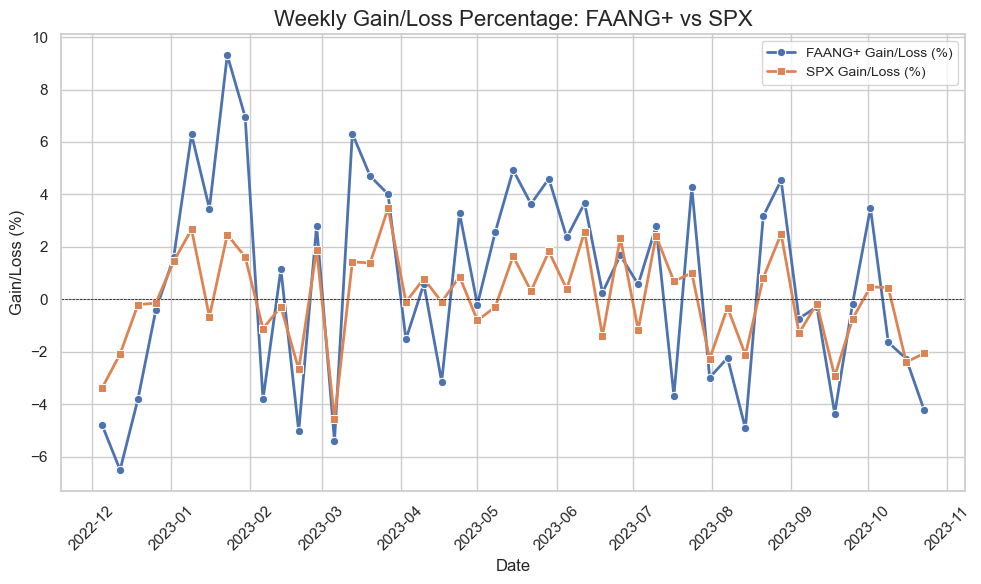

In [21]:
# Setting the Seaborn style
sns.set_theme(style="whitegrid")

# Creating the figure and axes for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotting the FAANG+ and SPX weekly gain/loss percentages
sns.lineplot(data=weekly_df, x=weekly_df.index, y='FAANG+ Gain/Loss (%)', 
             ax=ax, 
             label='FAANG+ Gain/Loss (%)', 
             marker='o', 
             linestyle='-', 
             linewidth=2)

sns.lineplot(data=weekly_df, x=weekly_df.index, y='SPX Gain/Loss (%)', 
             ax=ax, 
             label='SPX Gain/Loss (%)', 
             marker='s', 
             linestyle='-', 
             linewidth=2)

# Customizing the plot
ax.set_title('Weekly Gain/Loss Percentage: FAANG+ vs SPX', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Gain/Loss (%)', fontsize=12)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Adding a dashed horizontal line at y=0
ax.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot
plt.show()

In [22]:
# Calculating the accumulated gain/loss percentages
weekly_df['FAANG+ Accumulated (%)'] = weekly_df['FAANG+ Gain/Loss (%)'].cumsum()
weekly_df['SPX Accumulated (%)'] = weekly_df['SPX Gain/Loss (%)'].cumsum()

In [23]:
weekly_df.head()

,FAANG+ Gain/Loss (%),SPX Gain/Loss (%),FAANG+ vs SPX (%),FAANG+ Accumulated (%),SPX Accumulated (%)
Date,,,,,
2022-12-05,-4.80,-3.37,-1.42,-4.80,-3.37
2022-12-12,-6.50,-2.08,-4.41,-11.30,-5.45
2022-12-19,-3.80,-0.20,-3.61,-15.10,-5.65
2022-12-26,-0.41,-0.14,-0.27,-15.51,-5.79
2023-01-02,1.60,1.45,0.15,-13.91,-4.34


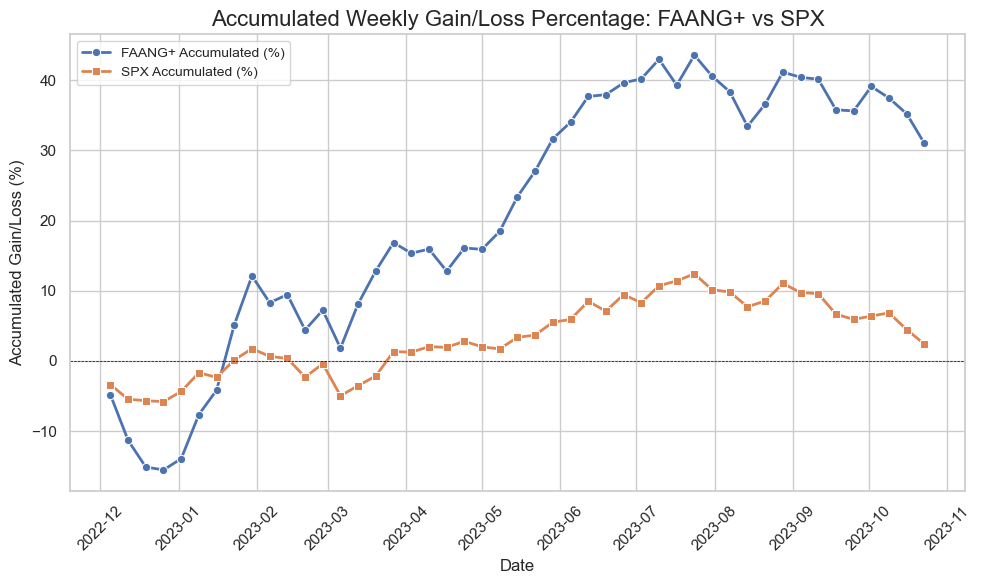

In [24]:
# Creating the figure and axes for the plot
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plotting the FAANG+ and SPX accumulated weekly gain/loss percentages overlapped
sns.lineplot(data=weekly_df, x=weekly_df.index, y='FAANG+ Accumulated (%)', 
             ax=ax, 
             label='FAANG+ Accumulated (%)', 
             marker='o', 
             linestyle='-', 
             linewidth=2)

sns.lineplot(data=weekly_df, x=weekly_df.index, y='SPX Accumulated (%)', 
             ax=ax, 
             label='SPX Accumulated (%)', 
             marker='s', 
             linestyle='-', 
             linewidth=2)

# Customizing the plot
ax.set_title('Accumulated Weekly Gain/Loss Percentage: FAANG+ vs SPX', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Accumulated Gain/Loss (%)', fontsize=12)
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Adding a dashed horizontal line at y=0
ax.legend(loc='upper left', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()

# Showing the plot
plt.show()
